In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle as pkl

import sys
sys.path.append('../../')

from Subroutines import spectral_radius

# Load Data

In [2]:
data_file_names = ['UnconstrainedLearning','SafeLearning','Plain','UnconstrainedLQR','ConstrainedLQR','Parameters']

In [3]:
data = {}
for name in data_file_names:
    with open('./data/{}.pkl'.format(name),'rb') as f:
        data[name] = pkl.load(f)

In [4]:
data['Parameters']

{'Q': array([[1, 0],
        [0, 1]]),
 'R': array([[1.]]),
 'D_x': array([[ 1.,  0.],
        [ 0.,  1.],
        [-1., -0.],
        [-0., -1.]]),
 'd_x': array([6., 2., 6., 2.]),
 'D_u': array([[ 1.],
        [-1.]]),
 'd_u': array([4., 4.]),
 'A': array([[ 1.00000000e+00,  1.00000000e-01],
        [-5.53978744e-04,  9.90068330e-01]]),
 'B': array([[0. ],
        [0.1]]),
 'H': 20,
 'eta_bar': 0.2}

In [5]:
A = data['Parameters']['A']

In [6]:
spectral_radius(A)

0.9950496107827632

# Plotting

## The plotting handler

In [7]:
def plot_with_errorband(ax,trial_data,label=''):
    mu = np.mean(trial_data,axis=0)
    std = np.std(trial_data,axis=0)

    indices = range(len(mu))

    ax.plot(np.array(mu),label=label)
    ax.fill_between(indices,mu+std,mu-std,alpha=0.2)

## x,v,u vs time

## A figure showing unconstraint LQR violates actual constraints, either in x or in u.

In [8]:
x_max = data['Parameters']['d_x'][0]
v_max = data['Parameters']['d_x'][1]
u_max = data['Parameters']['d_u'][0]

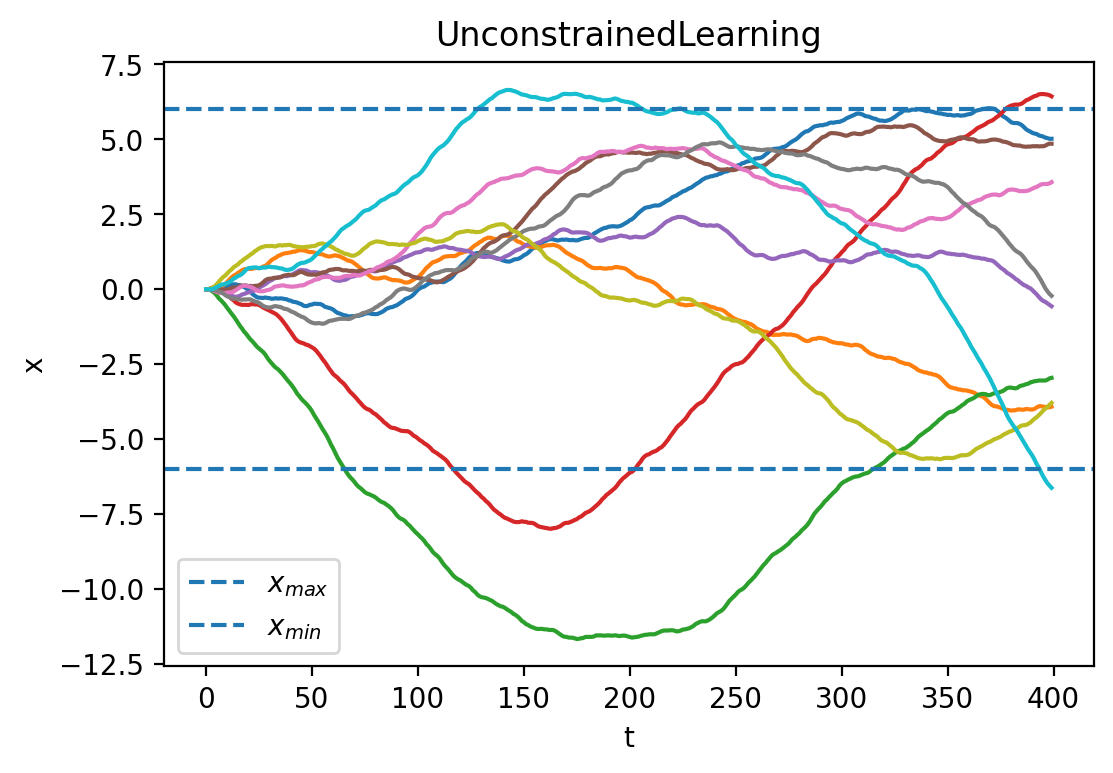

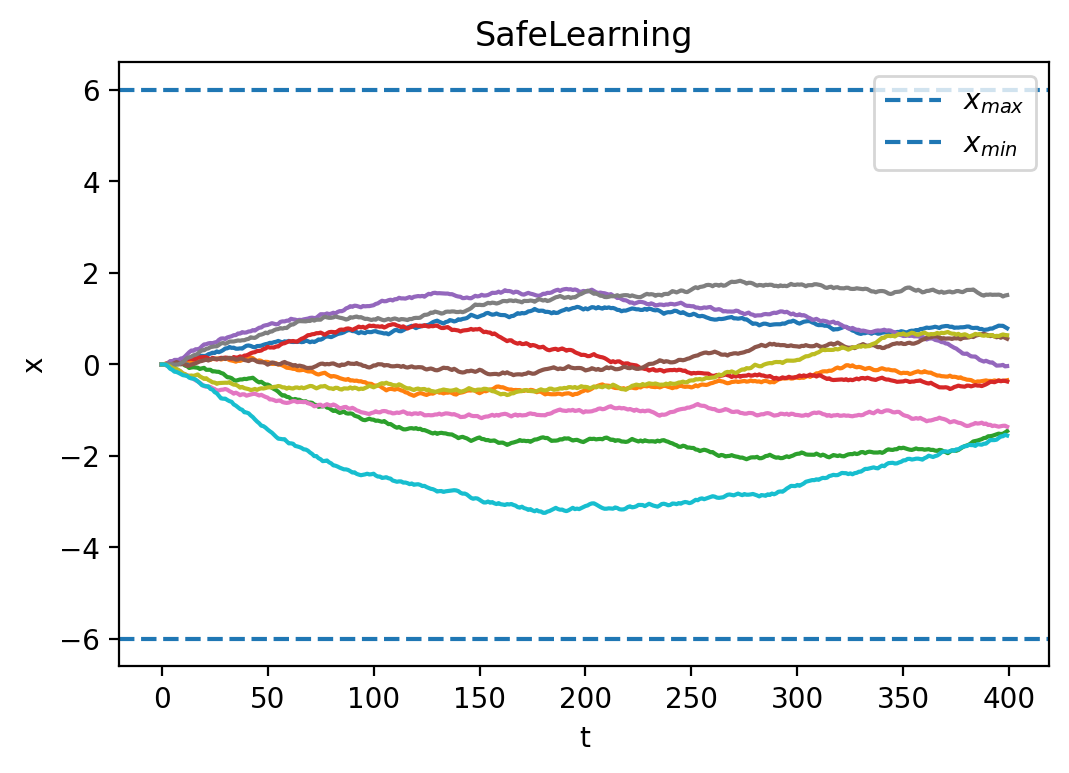

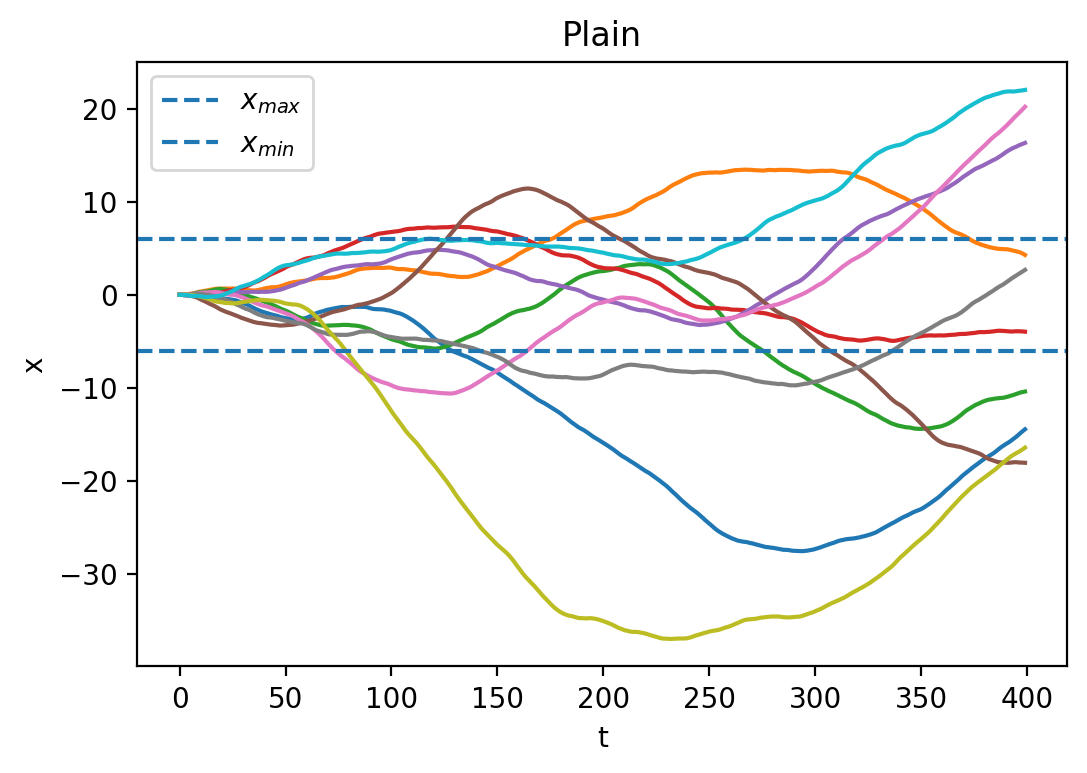

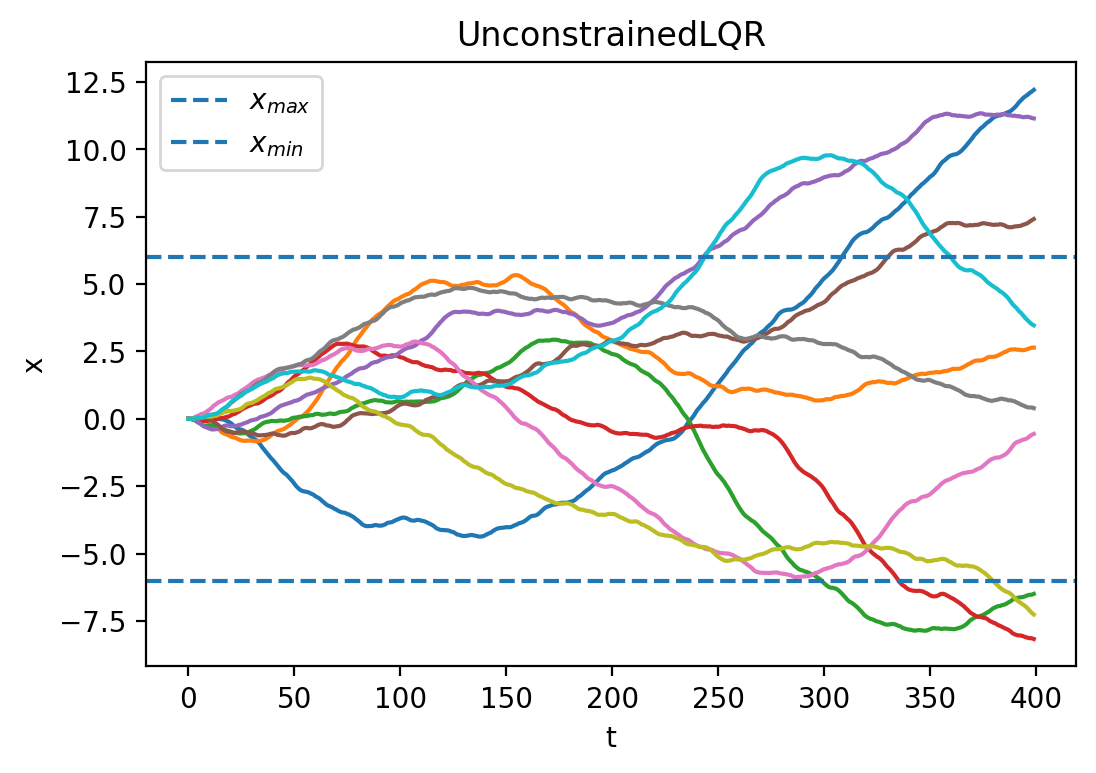

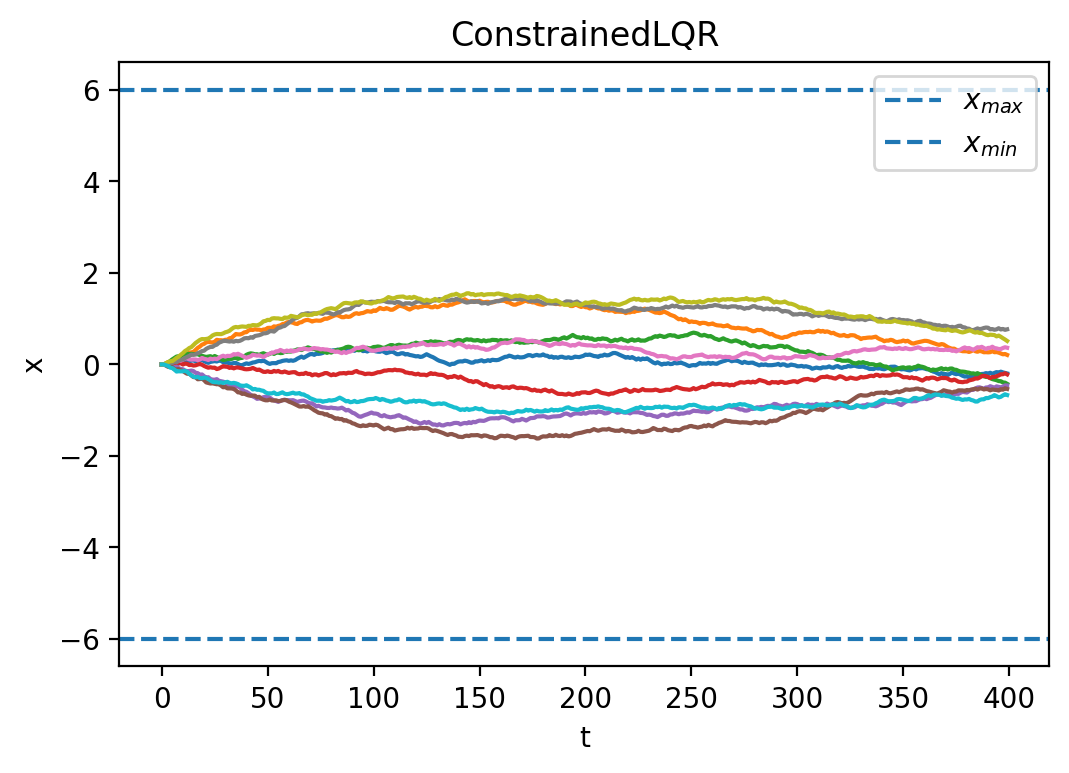

In [9]:
# alg_names = ['SafeLearning','Plain','Benchmark']
alg_names =  ['UnconstrainedLearning','SafeLearning','Plain','UnconstrainedLQR','ConstrainedLQR']
# alg_names =  ['UnconstrainedLearning','SafeLearning','Plain']


for name in alg_names:
    
    plt.figure(dpi=200)
    ax = plt.gca()
#     print(name)
#     trial_data = [np.array(d['x'])[:,0,:].flatten() for d in data[name]]
    for d in data[name]:
        ax.plot(np.array(d['x'])[:,0,:].flatten())
#         print(np.array(d['x']).shape)
#         plt.show()
#     plot_with_errorband(ax,trial_data,name)

    ax.axhline(x_max,label=r'$x_{max}$',ls='dashed')
    ax.axhline(-x_max,label=r'$x_{min}$',ls='dashed')
    
    ax.set_title(name)
    
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.legend()


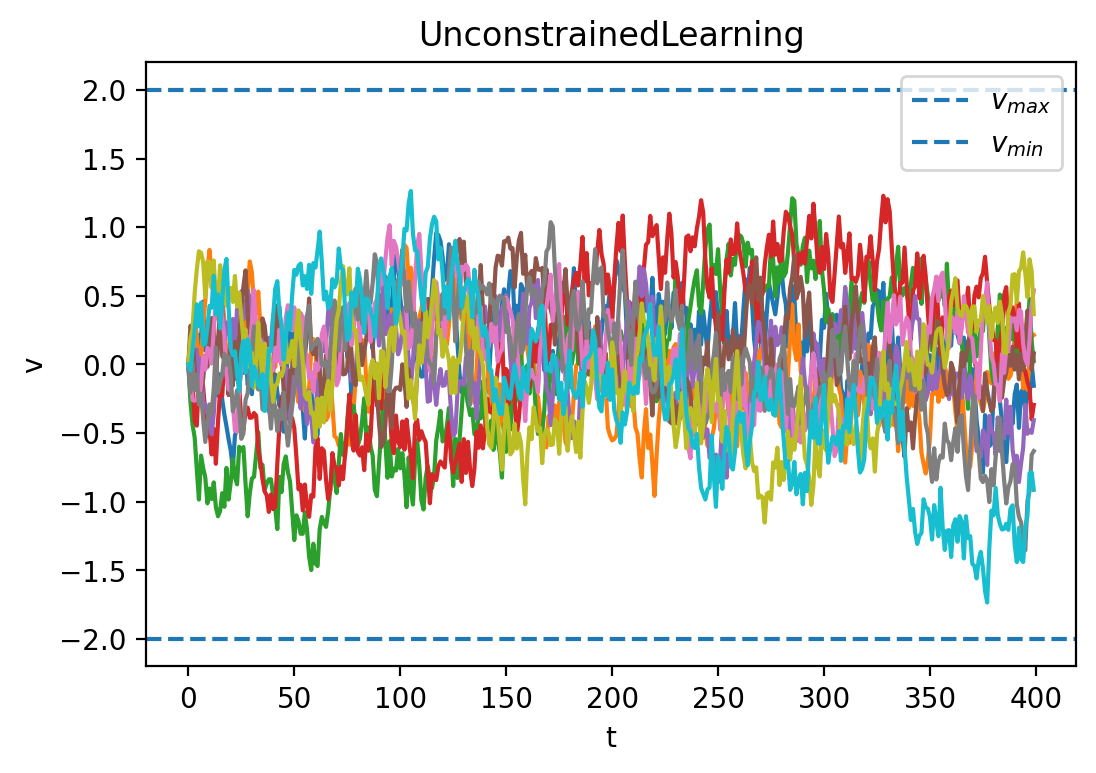

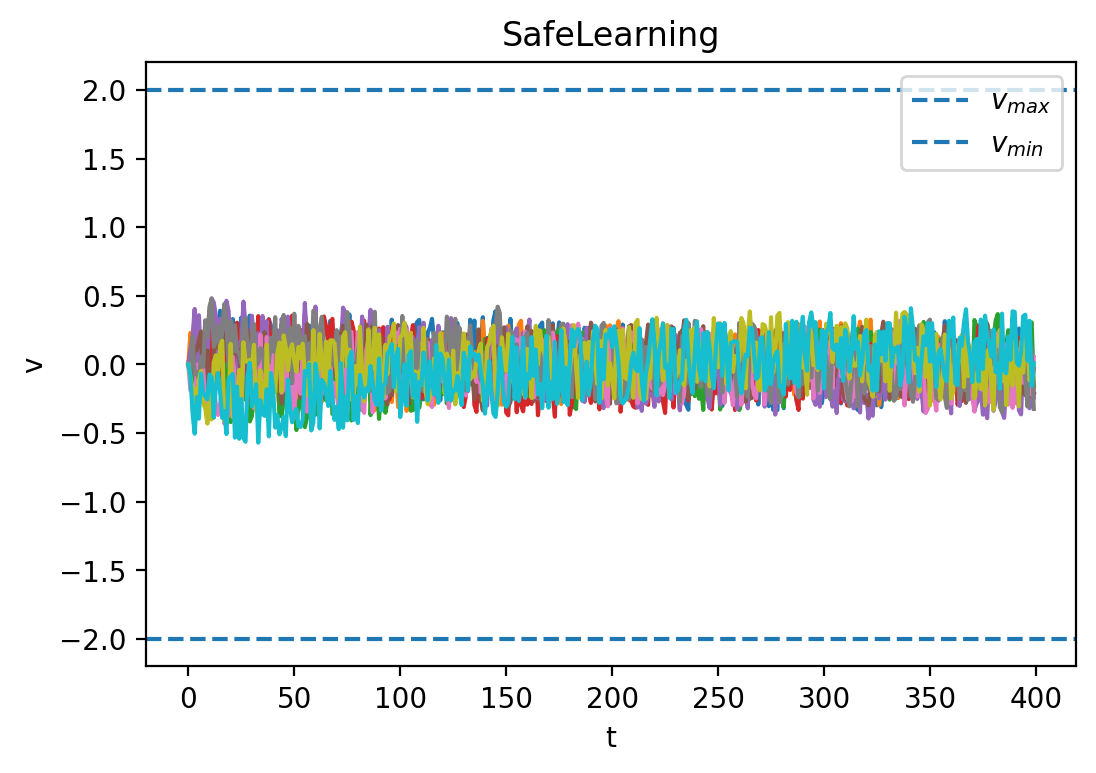

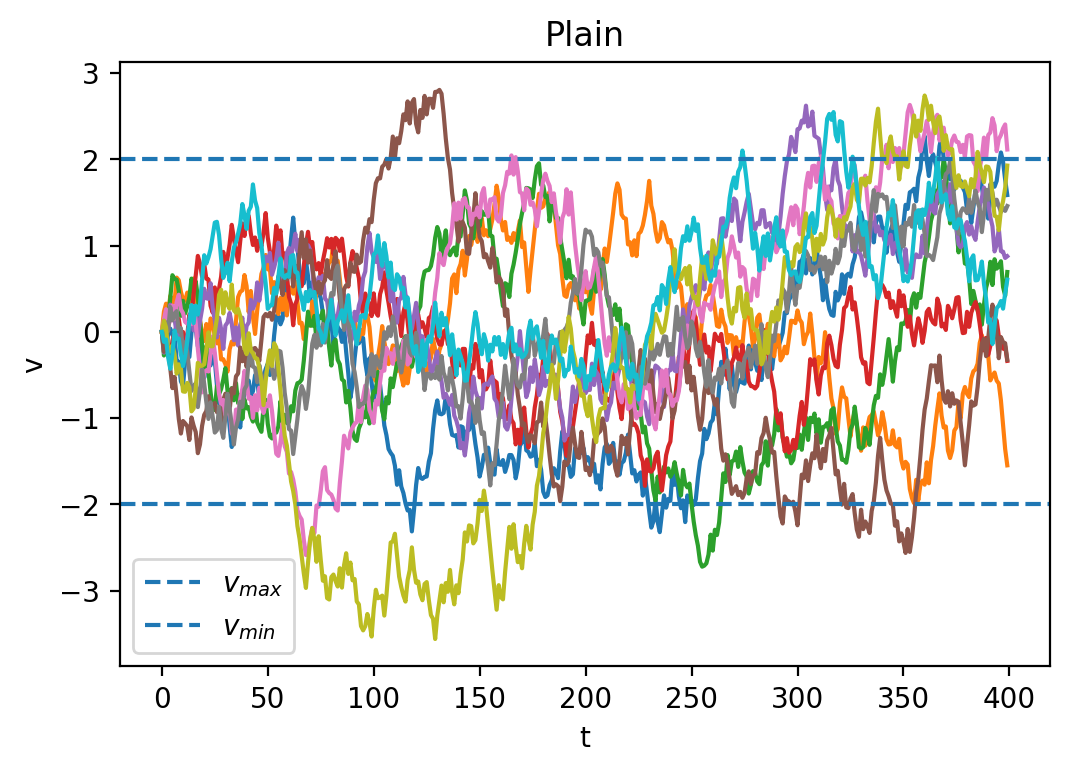

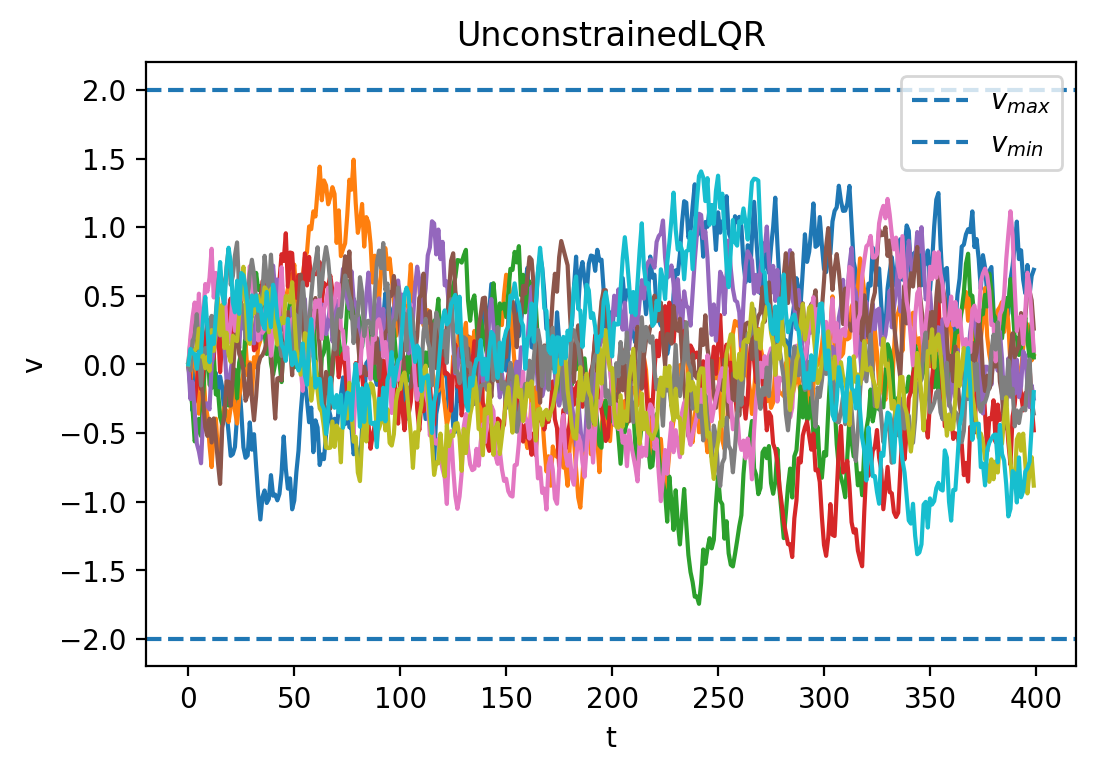

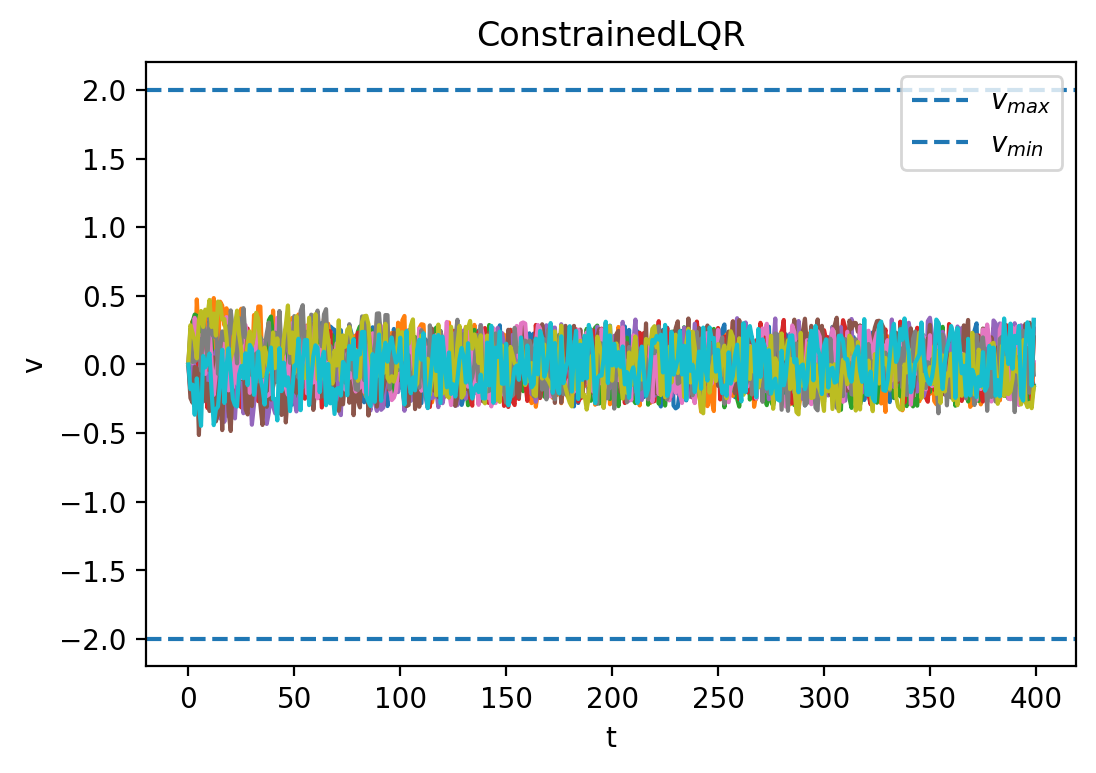

In [10]:
for name in alg_names:
    
    plt.figure(dpi=200)
    ax = plt.gca()
#     print(name)
#     trial_data = [np.array(d['x'])[:,0,:].flatten() for d in data[name]]
    for d in data[name]:
        ax.plot(np.array(d['x'])[:,1,:].flatten())
#         print(np.array(d['x']).shape)
#         plt.show()
#     plot_with_errorband(ax,trial_data,name)

    ax.axhline(v_max,label=r'$v_{max}$',ls='dashed')
    ax.axhline(-v_max,label=r'$v_{min}$',ls='dashed')
    
    ax.set_title(name)
    
    ax.set_xlabel('t')
    ax.set_ylabel('v')
    ax.legend()


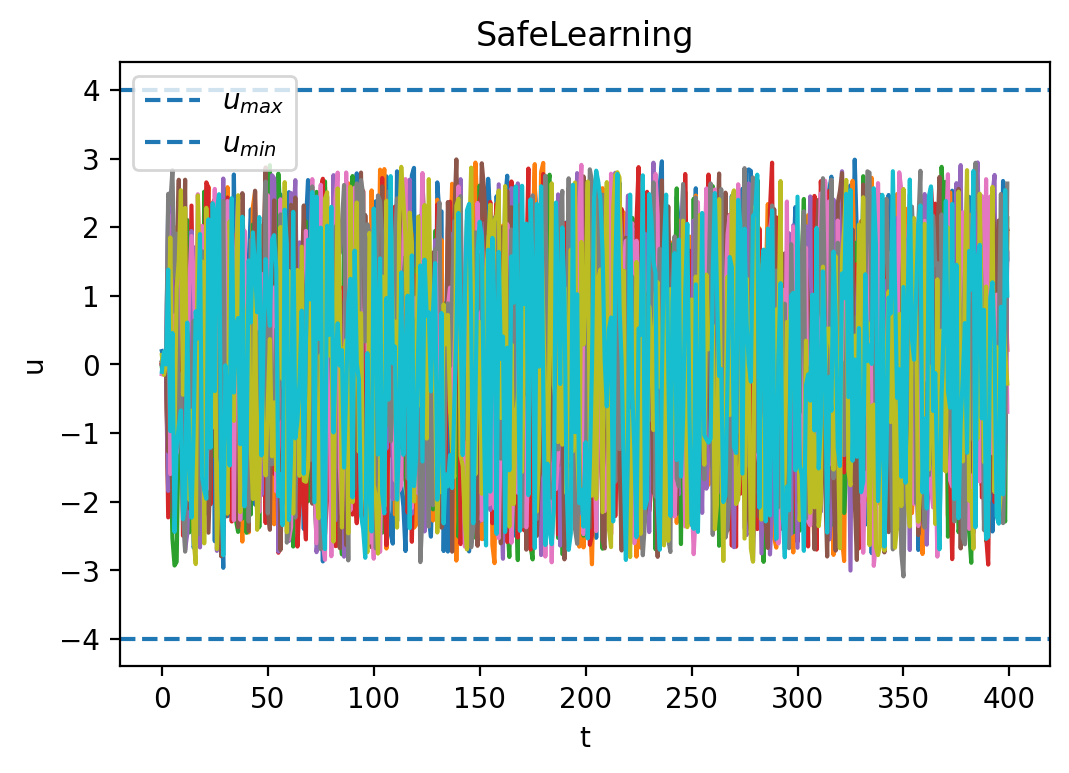

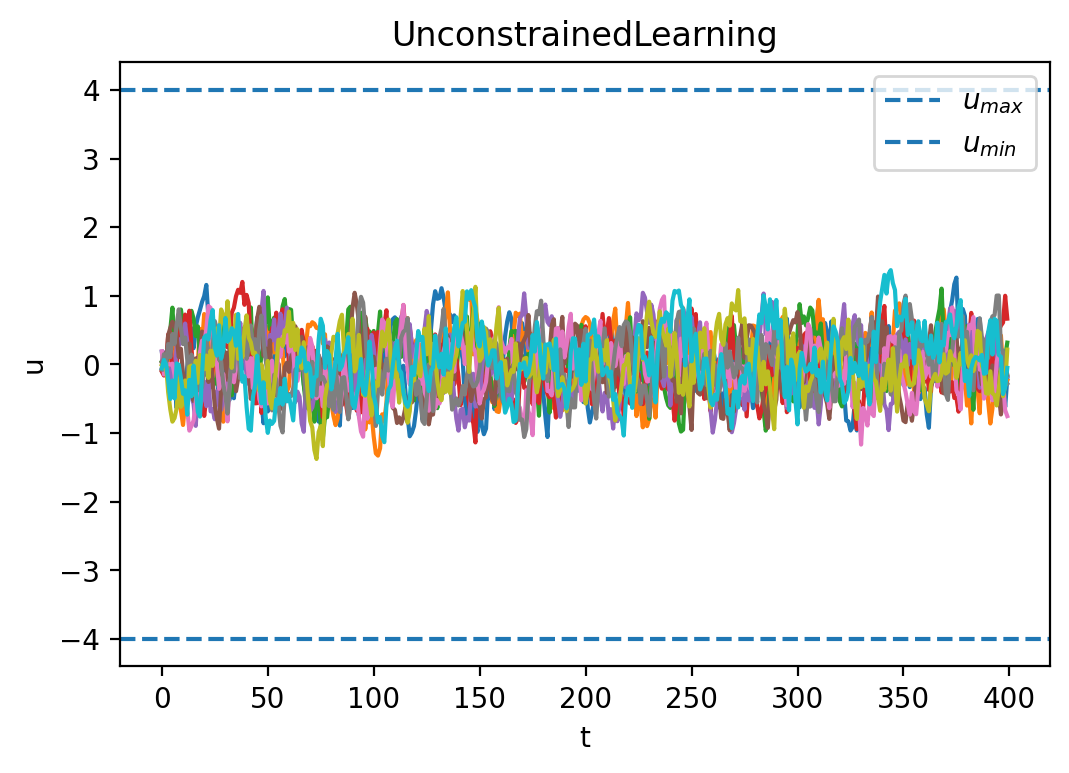

In [11]:
control_alg = ['SafeLearning','UnconstrainedLearning']
for name in control_alg:
    
    plt.figure(dpi=200)
    ax = plt.gca()
#     print(name)
#     trial_data = [np.array(d['x'])[:,0,:].flatten() for d in data[name]]
    for d in data[name]:
        ax.plot(np.array(d['u']).flatten())
#         print(np.array(d['x']).shape)
#         plt.show()
#     plot_with_errorband(ax,trial_data,name)

    ax.axhline(u_max,label=r'$u_{max}$',ls='dashed')
    ax.axhline(-u_max,label=r'$u_{min}$',ls='dashed')
    
    ax.set_title(name)
    
    ax.set_xlabel('t')
    ax.set_ylabel('u')
    ax.legend()

    


## Estimation error vs t.

In [12]:
thetas = [d['theta'] for d in data['SafeLearning']]
A = data['Parameters']['A']
B = data['Parameters']['B']

As = np.array([[t[0] for t in theta_hist] for theta_hist in thetas])
Bs = np.array([[t[1] for t in theta_hist] for theta_hist in thetas])

# As.shape = (# trials, # refits, x_dim, x_dim)
# Bs.shape = (# trials, # refits, x_dim, u_dim)

A_diff = np.linalg.norm(As-A,np.inf,axis=(-1,-2))
B_diff = np.linalg.norm(Bs-B,np.inf,axis=(-1,-2))

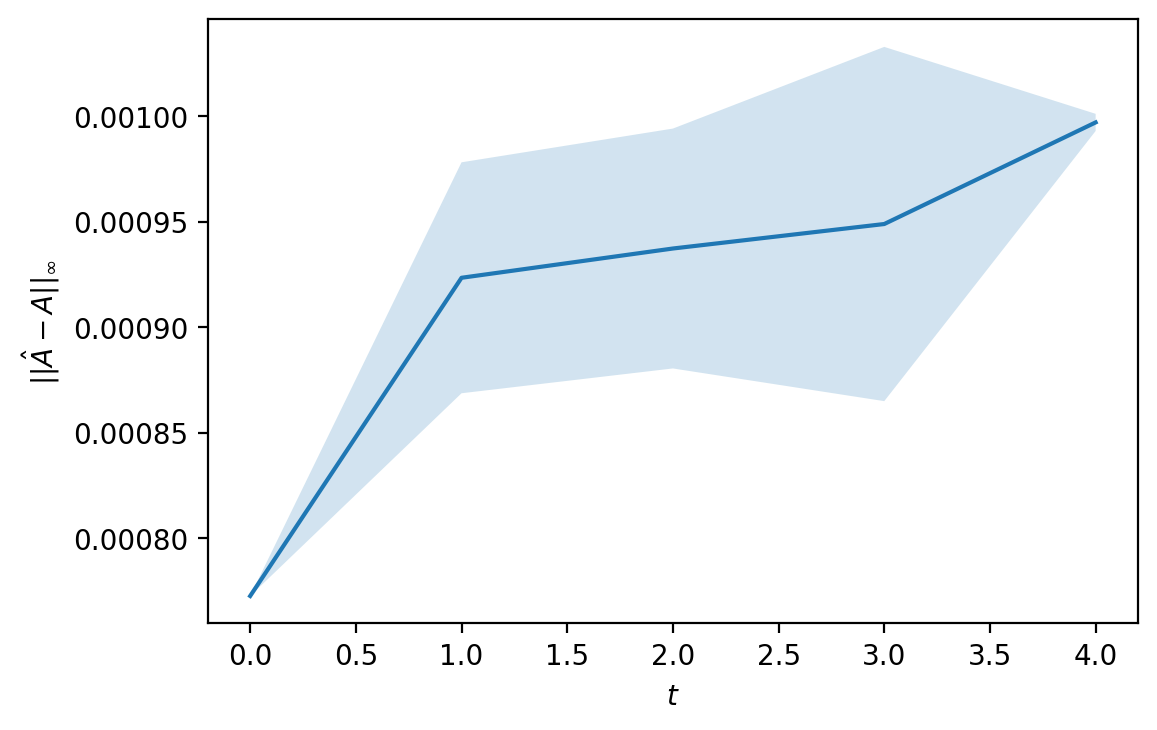

In [13]:
plt.figure(dpi=200)
ax = plt.gca()
plot_with_errorband(ax,A_diff)
ax.set_ylabel(r'$||\hat{A}-A||_{\infty}$')
ax.set_xlabel(r'$t$')
plt.show()

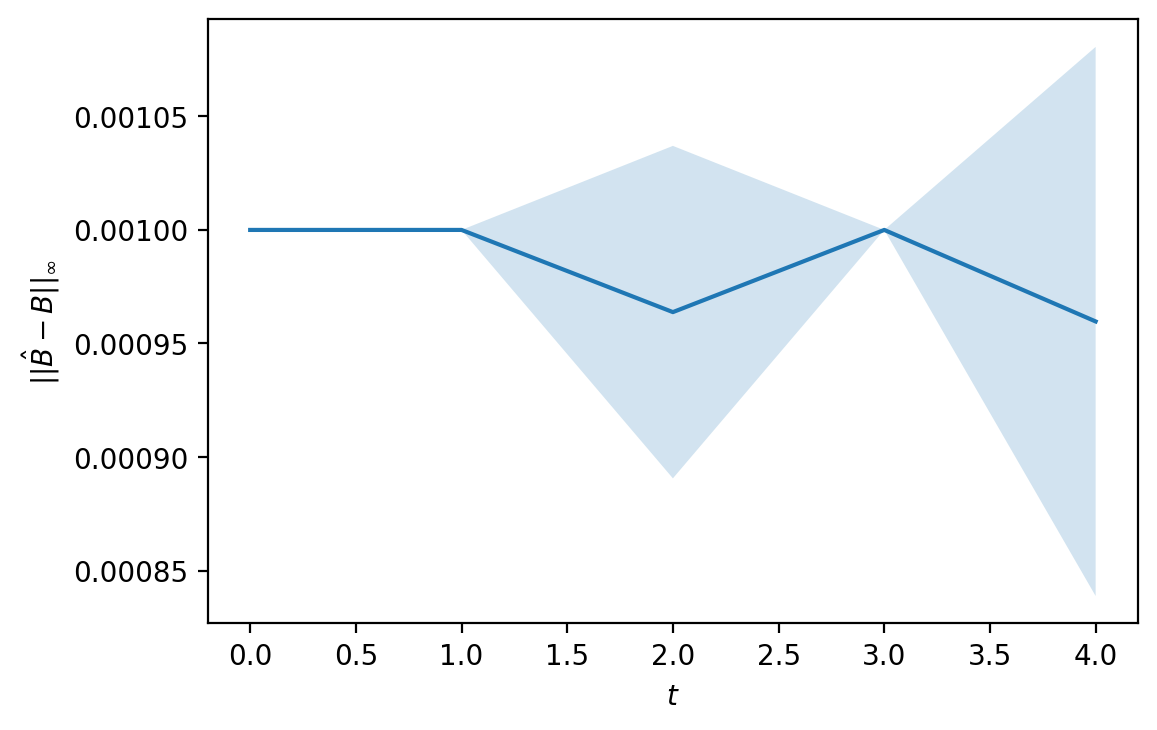

In [14]:
plt.figure(dpi=200)
ax = plt.gca()
plot_with_errorband(ax,B_diff)
ax.set_ylabel(r'$||\hat{B}-B||_{\infty}$')
ax.set_xlabel(r'$t$')
plt.show()

# LQR Cost and estimation error vs $\bar{\eta}$

## LQR Regret vs $t$

In [15]:
Q = data['Parameters']['Q']
R = data['Parameters']['R']

control_cost = {}
for alg in control_alg:
    
    x_hist = np.array([np.array(d['x']) for d in data[alg]])
    u_hist = np.array([np.array(d['u']) for d in data[alg]])
    control_cost[alg] = cost(Q,x_hist) + cost(R,u_hist[:,:,np.newaxis,np.newaxis])


NameError: name 'cost' is not defined

In [ ]:
plt.figure(dpi=200)
ax = plt.gca()
for key,item in control_cost.items():
    plot_with_errorband(ax,item,key)

# plot_with_errorband(ax,control_cost['SafeLearning']-control_cost['Benchmark'],'Regret')
ax.set_ylabel('Cost')
ax.set_xlabel(r'$t$')
ax.legend()
plt.show()